# Taller Final

-James Uribe

-Juan Francisco Torres

La detección temprana de fallos operativos en una empresa es muy importante para prevenir interrupciones dentro de la producción y minimizar los costos de mantenimiento. Una forma de lograr esto es mediante la implementación de un sistema de mantenimiento predictivo, que utiliza datos históricos y técnicas de aprendizaje automático para predecir cuándo puede ocurrir un fallo y tomar medidas preventivas, tal es el caso de la librería sklearn que fue utilizada en el modelo para realizar el proceso de regresión logística.

Este trabajo fue realizado basándose en una base de datos de Kaggle llamada Machine Predictive Maintenance Classification que contiene información sobre el funcionamiento de una serie de máquinas en una empresa.El objetivo de este proyecto fue crear un modelo de regresión logística para poder predecir cuando una máquina estaba en óptimas condiciones o si iba a presentar un fallo. Después de esto, se utilizó un modelo de montecarlo con el fin de generar diferente escenarios, en los que las variables Air temperature, Process temperature, Rotational speed, Torque, Tool wear toman diferentes valores en base a una distribución normal y hallar la probabilidad de que las máquinas presentaran un fallo.

La regresión logística es una técnica de aprendizaje automático que se utiliza para predecir la probabilidad de un evento binario, en este caso, el fallo o la no falla de una máquina. Se utilizó la base de datos de Kaggle para entrenar y validar el modelo de regresión logística. El conjunto de datos se dividió en dos partes: el conjunto de entrenamiento, que se utilizó para entrenar el modelo, y el conjunto de validación, que se utilizó para evaluar el rendimiento del modelo.

Para mejorar la precisión del modelo, se realizaron varias transformaciones de los datos, como la normalización y la eliminación de datos atípicos. Además, se utilizaron técnicas de selección de características para identificar las variables más importantes para la detección de fallos.
Una vez que se entrenó y validó el modelo de regresión logística, se aplicó un modelo de Montecarlo para simular diferentes escenarios y evaluar su efectividad en la detección de fallos. El modelo de Montecarlo es una técnica estadística que se utiliza para simular diferentes escenarios basados en la aleatoriedad de los datos. Se simularon diferentes escenarios para evaluar la efectividad del modelo en la detección de fallos en diferentes condiciones de temperatura en diferentes etapas y bajo diferentes cargas de trabajo.

Los resultados del proyecto indicaron que el modelo de regresión logística fue efectivo en la detección de fallos operativos en la empresa. La aplicación del modelo de Montecarlo permite simular diferentes escenarios y evaluar la efectividad del modelo en condiciones realistas.

La justificación de este proyecto radica en la necesidad de minimizar los costos de mantenimiento y prevenir interrupciones en la producción. La detección temprana de fallos operativos en las máquinas de una empresa puede evitar pérdidas económicas significativas y mejorar la eficiencia de la producción. La implementación de un sistema de mantenimiento predictivo basado en técnicas de aprendizaje automático como la regresión logística y el modelo de Montecarlo puede mejorar significativamente la eficacia de la detección temprana de fallos.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
from scipy.optimize import minimize
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from scipy.stats import norm


In [ ]:
base_datos = pd.read_csv("/content/predictive_maintenance.csv")
base_datos

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


<Axes: >

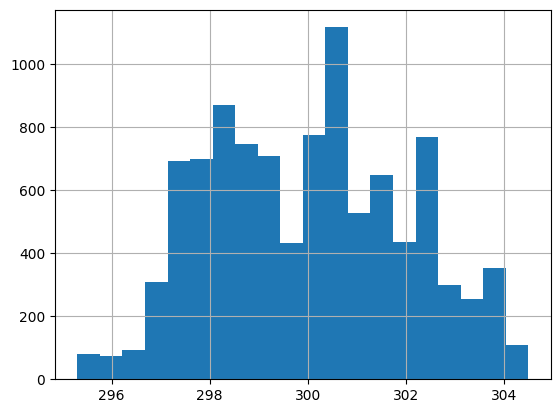

In [ ]:
base_datos["Air temperature [K]"].hist(bins=20)

<Axes: >

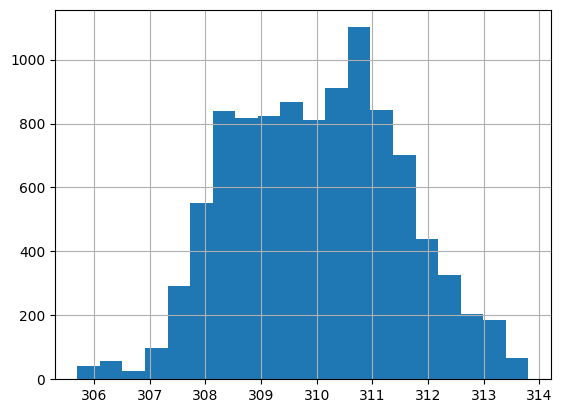

In [ ]:
base_datos["Process temperature [K]"].hist(bins=20)

<Axes: >

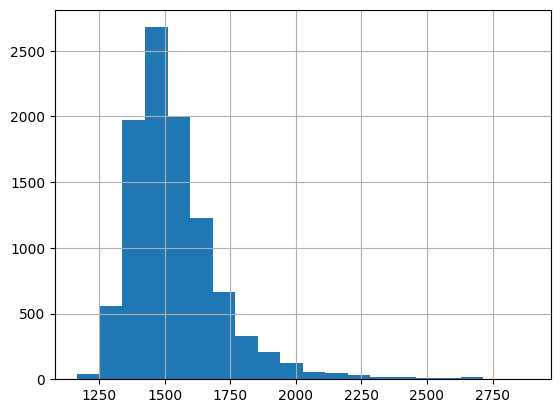

In [ ]:
base_datos["Rotational speed [rpm]"].hist(bins=20)

<Axes: >

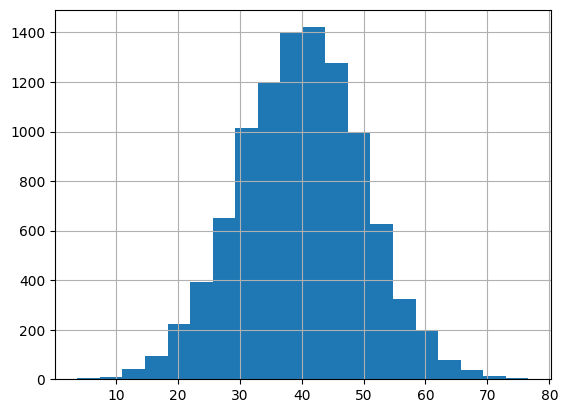

In [ ]:
base_datos["Torque [Nm]"].hist(bins=20)

<Axes: >

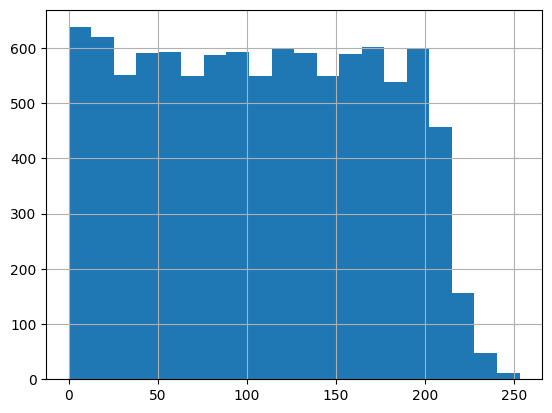

In [ ]:
base_datos["Tool wear [min]"].hist(bins=20)

In [ ]:
correlacion = base_datos.corr()
correlacion

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


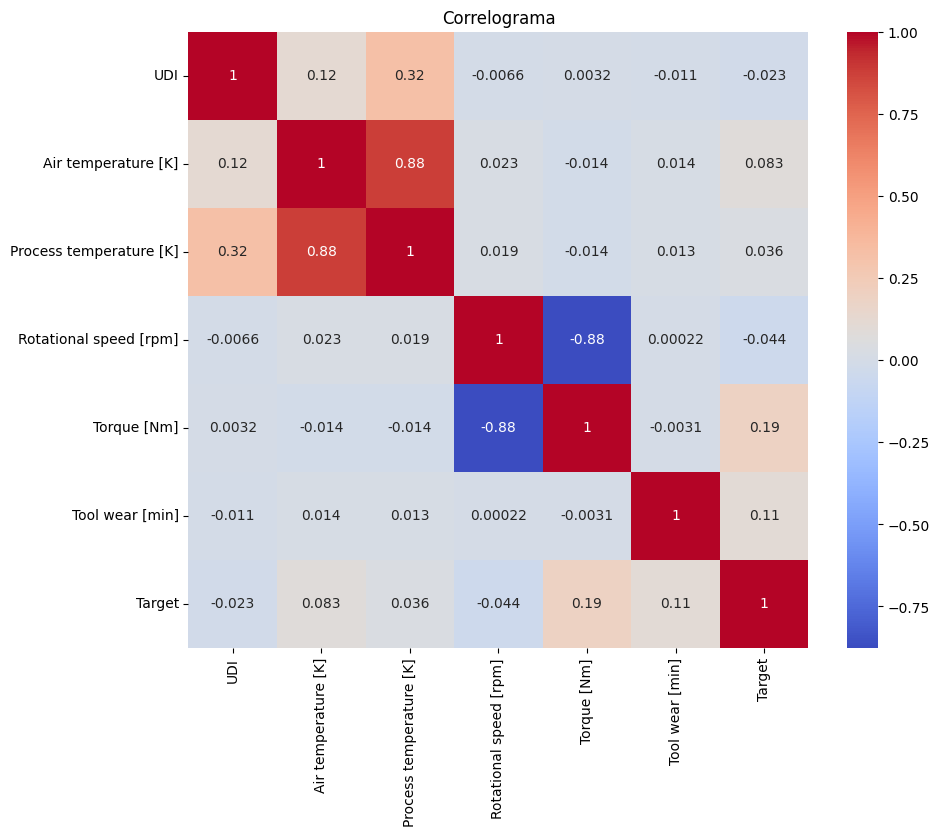

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Correlograma")
plt.show()

In [ ]:
X = base_datos[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]]
y = base_datos["Target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg_model = LogisticRegression()
modelo = logreg_model.fit(X_train, y_train)

In [ ]:
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print(logreg_model.coef_)

[[ 0.84726286 -0.93337285  0.0115102   0.27973223  0.01316387]]


In [ ]:
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

Precisión en el conjunto de entrenamiento: 0.97
Precisión en el conjunto de prueba: 0.97


In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión en el conjunto de prueba:")
print(conf_matrix)

Matriz de confusión en el conjunto de prueba:
[[1929   10]
 [  45   16]]


In [ ]:
sexo = np.matrix(y_train_pred).T
massexo = pd.DataFrame(sexo)
np.count_nonzero(massexo)

79

In [ ]:
# Calcular la probabilidad predicha de y=1 para cada fila en los datos de entrada
probs_y = modelo.predict_proba(X)[:, 1]

In [ ]:
npX=np.matrix(X)
dfX=pd.DataFrame(X)
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [ ]:

num_scenarios = 1000
probs_y_mc = []
for i in range(num_scenarios):
    x1 = np.random.normal(np.mean(npX[:, 0]), np.std(npX[:, 0]))
    x2 = np.random.normal(np.mean(npX[:, 1]), np.std(npX[:, 1]))
    x3 = np.random.normal(np.mean(npX[:, 2]), np.std(npX[:, 2]))
    x4 = np.random.normal(np.mean(npX[:, 3]), np.std(npX[:, 3]))
    x5 = np.random.normal(np.mean(npX[:, 4]), np.std(npX[:, 4]))
    linear_pred = modelo.intercept_ + modelo.coef_[0][0] * x1 + modelo.coef_[0][1] * x2 + modelo.coef_[0][2] * x3 + modelo.coef_[0][3] * x4 + modelo.coef_[0][4] * x5
    p_y = 1 / (1 + np.exp(-linear_pred))
    probs_y_mc.append(p_y)




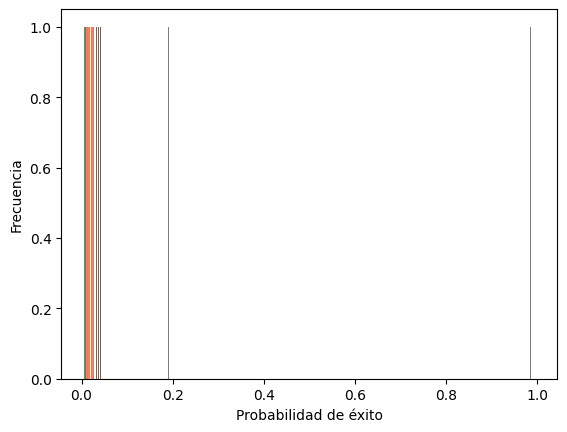

In [ ]:
plt.hist(probs_y_mc, bins=20)
plt.xlabel('Probabilidad de éxito')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Calcular la probabilidad media de y=1 
p = np.mean(probs_y_mc)
p

0.1400496058663584

In [ ]:
#Error estandar de probabilidad de y
ee = np.std(probs_y_mc)
ee

0.2801880335211513

In [ ]:
nivel_confianza = 0.95
z = norm.ppf(1 - (1 - nivel_confianza)/2)

In [ ]:
#Intervalo de confianza
n = 1000
IC_lower = p - z * np.sqrt(p * (1 - p) / n)
IC_upper = p + z * np.sqrt(p * (1 - p) / n)
print(IC_lower,IC_upper) 

0.12230759566204247 0.16583744332023764
